In [ ]:
!kaggle datasets download -d akshatshaw7/cardiovascular-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/akshatshaw7/cardiovascular-disease-dataset
License(s): DbCL-1.0
cardiovascular-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/cardiovascular-disease-dataset.zip

Archive:  /content/cardiovascular-disease-dataset.zip
  inflating: health_data.csv         


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('/content/health_data.csv')

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 14)

In [ ]:
df.isnull().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Data Cleaning


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id'])
df = df[df['ap_hi'] <= 300]
df = df[df['ap_lo'] <= 300]
df = df[df['height'] >= 130]
df = df[df['weight'] >= 30]

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [ ]:
df['age'] = (df['age'] / 365).astype(int)  # Assuming each year has 365 days on average

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,47,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [ ]:
 df['age'].max()

64

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,47,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Distribution of the target variable 'cardio':


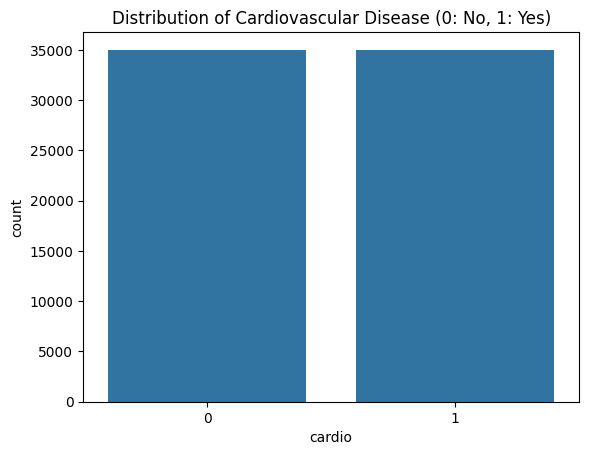

In [ ]:
# Distribution of the target variable 'cardio'
print("\nDistribution of the target variable 'cardio':")
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease (0: No, 1: Yes)')
plt.show()


Age distribution:


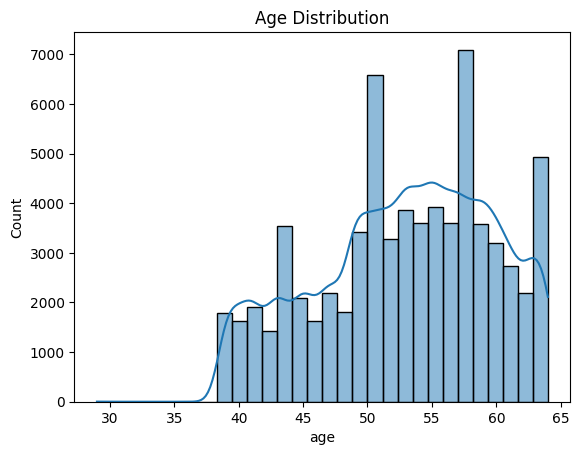

In [ ]:
# Age distribution
print("\nAge distribution:")
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


Gender distribution:


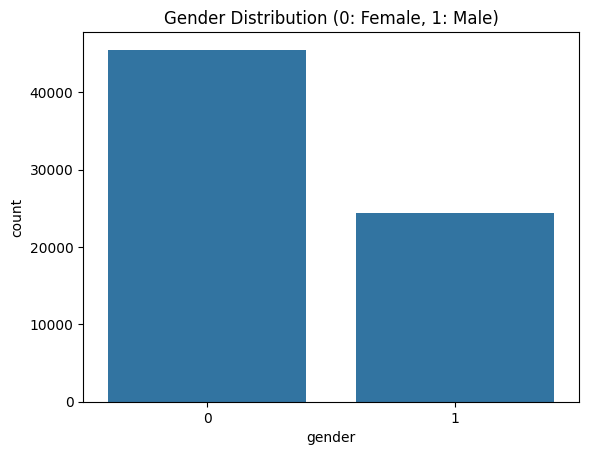

In [ ]:
# Gender distribution
print("\nGender distribution:")
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution (0: Female, 1: Male)')
plt.show()


Correlation matrix:


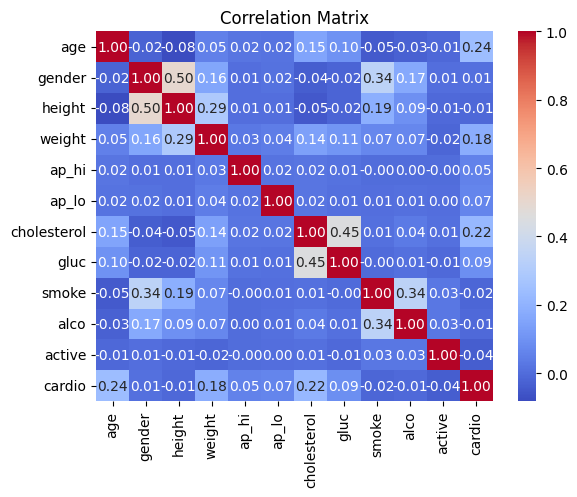

In [ ]:
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Pairplot for selected variables:


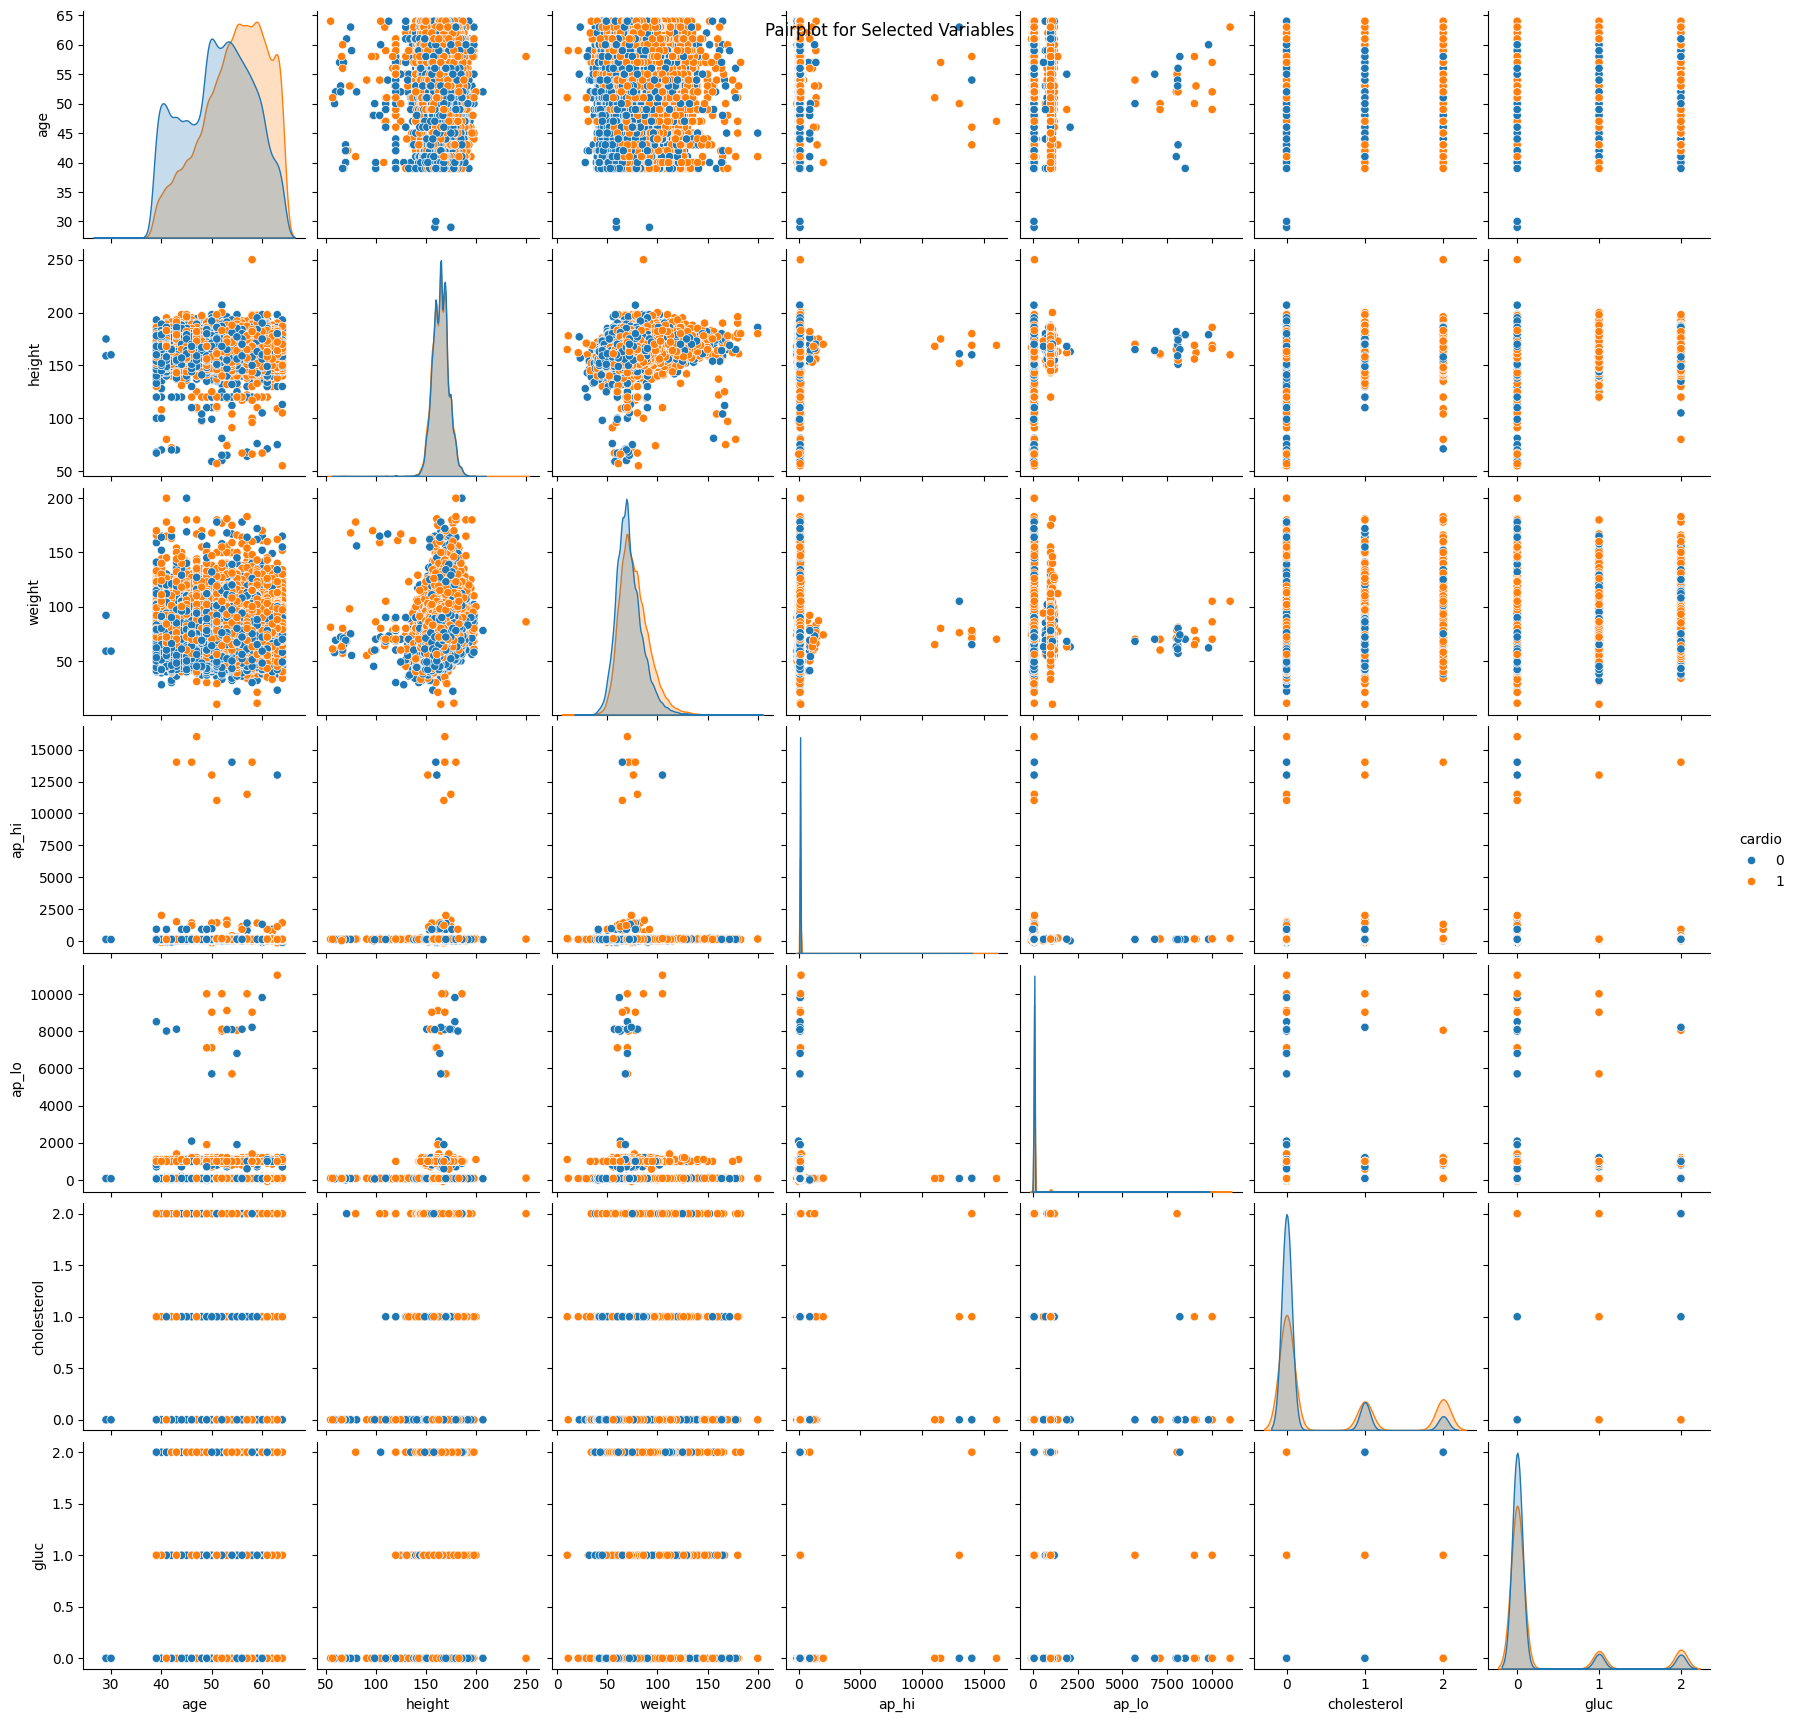

In [ ]:
# Pairplot for selected variables
print("\nPairplot for selected variables:")
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']], hue='cardio')
plt.suptitle('Pairplot for Selected Variables')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def min_max_normalization(series):
    min_value = series.min()
    max_value = series.max()
    normalized_series = (series - min_value) / (max_value - min_value)
    return normalized_series

In [ ]:
df['normalized_ap_hi'] = min_max_normalization(df['ap_hi'])
df['normalized_ap_lo'] = min_max_normalization(df['ap_lo'])
df['normalized_weight'] = min_max_normalization(df['weight'])
df['normalized_age'] = min_max_normalization(df['age'])


In [ ]:
df = df.drop(['ap_hi', 'ap_lo', 'height', 'weight','age','gender'], axis=1)

In [ ]:
df.head(10)

,cholesterol,gluc,smoke,alco,active,cardio,normalized_ap_hi,normalized_ap_lo,normalized_weight,normalized_age
0,0,0,0,0,1,0,0.666667,0.576923,0.188235,0.600000
1,2,0,0,0,1,1,0.743590,0.615385,0.323529,0.742857
2,2,0,0,0,0,1,0.717949,0.538462,0.200000,0.628571
3,0,0,0,0,1,1,0.769231,0.653846,0.305882,0.542857
4,0,0,0,0,0,0,0.641026,0.500000,0.152941,0.514286
5,1,1,0,0,0,0,0.692308,0.576923,0.217647,0.885714
6,2,0,0,0,1,0,0.717949,0.576923,0.370588,0.885714
7,2,2,0,0,1,1,0.717949,0.615385,0.382353,0.914286
8,0,0,0,0,1,0,0.666667,0.538462,0.241176,0.542857
9,0,0,0,0,0,0,0.666667,0.500000,0.223529,0.714286


In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_train_transposed=X_train.T
X_val_transposed=X_val.T
X_test_transposed=X_test.T

In [ ]:
y_train=y_train.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [ ]:
X_test_transposed.shape

(9, 6892)

In [ ]:
import numpy as np

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        self.m = {} # the average of the gradients represents the speed and direction
        self.v = {} # variance of gradients

    def initialize_params(self, params):
        for key in params:
            self.m[key] = np.zeros_like(params[key])
            self.v[key] = np.zeros_like(params[key])

    def update_params(self, params, gradients):
        self.t += 1
        lr_t = self.learning_rate * np.sqrt(1 - self.beta2 ** self.t) / (1 - self.beta1 ** self.t)

        for key in params:
            gradient_key = 'd' + key.capitalize()
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * gradients[gradient_key] #ağırlıklı ortalama ile moment güncelleme
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (gradients[gradient_key] ** 2)

            m_corrected = self.m[key] / (1 - self.beta1 ** self.t) # momentlerin düzeltilmesi
            v_corrected = self.v[key] / (1 - self.beta2 ** self.t)

            params[key] -= lr_t * m_corrected / (np.sqrt(v_corrected) + self.epsilon)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.hidden_layers = []
        self.optimizer = AdamOptimizer(learning_rate=0.001)

    def add_hidden_layer(self,layer_type, size):
        if len(self.hidden_layers) == 0:
            # First hidden layer
            prev_layer_size = self.input_size
        else:
            prev_layer_size = self.hidden_layers[-1]['weights'].shape[0]

        if layer_type == 'relu':
            weights = np.random.randn(size, prev_layer_size) * np.sqrt(2 / prev_layer_size) #HE başlatma
        else:
            weights = np.random.randn(size, prev_layer_size) * np.sqrt(1 / prev_layer_size) #xavier başlatma
        biases = np.zeros((size,1))
        self.hidden_layers.append({'weights': weights, 'biases': biases})

    def relu(self, x):
        return np.maximum(0, x),(x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x)),(x)

    def sigmoid_derivative(self, x):
        return self.sigmoid(x)[0]*(1-self.sigmoid(x)[0])

    def binary_cross_entropy(self,A,Y):
        m = A.shape[1]

        return ((-1/m)*(np.dot(np.log(A), Y) + np.dot(np.log(1-A), 1-Y)))[0][0]

    def feedforward(self, X):
        caches = []
        a = X

        for i, hidden_layer in enumerate(self.hidden_layers):
          a_prev = a
          z = hidden_layer['weights'].dot(a_prev) + hidden_layer['biases']

          if i != len(self.hidden_layers) -1:
            a, activation_cache = self.relu(z)

          else:
            a,activation_cache = self.sigmoid(z)

          linear_cache = (a_prev, hidden_layer['weights'], hidden_layer['biases'])
          cache = (linear_cache,activation_cache)
          caches.append(cache)
        return a,caches


    def one_layer_backward_sigmoid(self,dA, cache):
      linear_cache, activation_cache = cache
      z = activation_cache # weighted value
      # dA error value in output
      dZ = dA*self.sigmoid_derivative(z) # error gradient

      a_prev, W, b = linear_cache
      m = a_prev.shape[1]
      dW = (1/m)*np.dot(dZ, a_prev.T)
      db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
      dA_prev = np.dot(W.T, dZ)

      return dA_prev, dW, db


    def one_layer_backward_relu(self,dA, cache):
        linear_cache, activation_cache = cache

        z = activation_cache
        #dA error gradient in the previous layer
        dZ = dA*self.relu_derivative(z)

        a_prev, W, b = linear_cache
        m = a_prev.shape[1]

        dW = (1/m)*np.dot(dZ,a_prev.T)
        db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        return dA_prev, dW, db

    def backpropagation(self, y,output,caches):
        L = len(caches)  # Total number of layers
        gradients = {}
        y = y.reshape(output.shape)
        dOutput = - (np.divide(y, output) - np.divide(1 - y, 1 - output))
        # Backpropagation for the output layer
        gradients['dA' + str(L)], gradients['dWeights' + str(L)], gradients['dBiases' + str(L)] = self.one_layer_backward_sigmoid(dOutput, caches[L - 1])
        # Backpropagation for other layers
        for l in reversed(range(L - 1)):
          current_cache = caches[l]
          dA_prev, dW, db = self.one_layer_backward_relu(gradients["dA" + str(l + 2)], current_cache)
          gradients["dA" + str(l+1)] = dA_prev
          gradients["dWeights" + str(l + 1)] = dW
          gradients["dBiases" + str(l + 1 )] = db

        return gradients
    def initialize_optimizer(self):
        # Start the optimizer to init the parameters
        params = {}
        for i, hidden_layer in enumerate(self.hidden_layers):
            params[f"weights{i + 1}"] = hidden_layer['weights']
            params[f"biases{i + 1}"] = hidden_layer['biases']
        self.optimizer.initialize_params(params)

    def update_params(self, gradients):
        params = {}
        for i, hidden_layer in enumerate(self.hidden_layers):
            params[f"weights{i + 1}"] = hidden_layer['weights']
            params[f"biases{i + 1}"] = hidden_layer['biases']

        # Update with optimizer
        self.optimizer.update_params(params, gradients)

    # def update_params(self,gradients,learning_rate):
    #   L = len(self.hidden_layers) // 2
    #   for l in range(L):
    #     layer = self.hidden_layers[l]
    #     layer['weights'] = layer['weights'] - learning_rate * gradients['dW'+str(l+1)]
    #     layer['biases'] = layer['biases'] -  learning_rate * gradients['db'+str(l+1)]


    def train(self, X_train, y_train,X_val,y_val, epochs):

        self.initialize_optimizer()

        costs_train = []
        costs_val = []
        for epoch in range(epochs):
            output, caches = self.feedforward(X_train)
            gradients = self.backpropagation(y_train, output, caches)
            cost_train = self.binary_cross_entropy(output, y_train)
            costs_train.append(cost_train)
            self.update_params(gradients)
            # self.update_params(gradients,learning_rate)
            output_val, _ = self.feedforward(X_val)
            cost_val = self.binary_cross_entropy(output_val, y_val)
            costs_val.append(cost_val)
            print(f"epoch: {epoch+1}, cost_train: {cost_train}, cost_val: {cost_val}")
        return costs_train,costs_val

    def predict(self, X):
        return self.feedforward(X)

In [ ]:
nn = NeuralNetwork(input_size=9)
nn.add_hidden_layer('relu',32)
nn.add_hidden_layer('relu',128)
nn.add_hidden_layer('relu',256)
nn.add_hidden_layer('relu',64)
nn.add_hidden_layer('sigmoid',1)



costs=nn.train(X_train_transposed, y_train,X_val_transposed,y_val, epochs=300)

epoch: 1, cost_train: 0.6928529541912279, cost_val: 0.6836704293261737
epoch: 2, cost_train: 0.6850736925384573, cost_val: 0.6787947737585119
epoch: 3, cost_train: 0.6804964905441683, cost_val: 0.675194414502741
epoch: 4, cost_train: 0.677181069034898, cost_val: 0.6724556713013851
epoch: 5, cost_train: 0.6746837269842563, cost_val: 0.6702774878865804
epoch: 6, cost_train: 0.6727512492676687, cost_val: 0.6683775949830767
epoch: 7, cost_train: 0.6711230655315797, cost_val: 0.6666271649673958
epoch: 8, cost_train: 0.6696729660533013, cost_val: 0.6649794376045325
epoch: 9, cost_train: 0.6683448276166561, cost_val: 0.6634240146283279
epoch: 10, cost_train: 0.6671192706249717, cost_val: 0.6619709070042077
epoch: 11, cost_train: 0.6659958760279183, cost_val: 0.6606239422013743
epoch: 12, cost_train: 0.6649855827490536, cost_val: 0.6593931612387816
epoch: 13, cost_train: 0.6640945569612242, cost_val: 0.6582879716770976
epoch: 14, cost_train: 0.6633212653261291, cost_val: 0.6572929184477742
epo

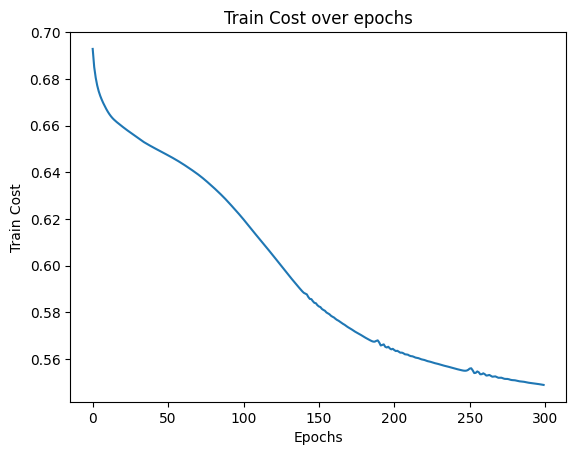

In [ ]:
plt.plot(range(300), costs[0])
plt.xlabel('Epochs')
plt.ylabel('Train Cost')
plt.title('Train Cost over epochs')
plt.show()

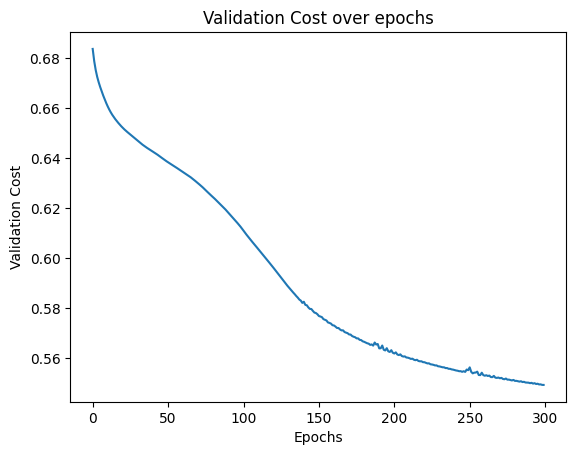

In [ ]:
plt.plot(range(300), costs[1])
plt.xlabel('Epochs')
plt.ylabel('Validation Cost')
plt.title('Validation Cost over epochs')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_test_transposed = X_test.T
predictions, _ = nn.predict(X_test_transposed)

#Apply a threshold to turn predictions into binary output
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
accuracy = accuracy_score(y_test, binary_predictions.T)
f1 = f1_score(y_test, binary_predictions.T)  # 'y_test' gerçek etiketlerdir
print("F1 Score: ", round(f1,3))
print("Accuracy: ",round(accuracy,3))

F1 Score:  0.721
Accuracy:  0.733


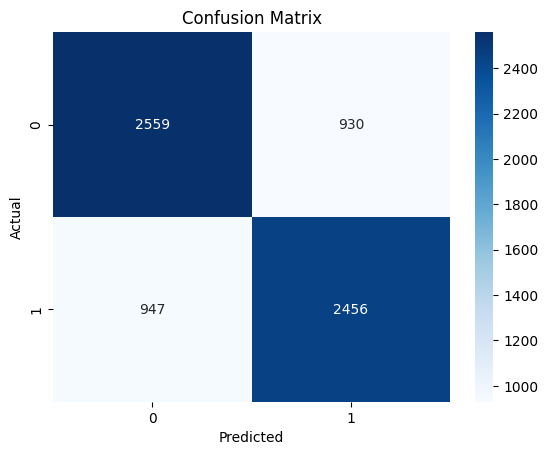

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn ile confusion matrix'i görselleştir

cm = confusion_matrix(y_test, binary_predictions.T)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'annot=True' değerleri gösterir
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
nn1 = NeuralNetwork(input_size=8)
nn1.add_hidden_layer('relu',32)
nn1.add_hidden_layer('relu',128)
nn1.add_hidden_layer('relu',64)
nn1.add_hidden_layer('sigmoid',1)



costs1=nn.train(X_train_transposed, y_train,X_val_transposed,y_val, epochs=300)

epoch: 1, cost_train: 0.5524136267339192, cost_val: 0.7459932820812039
epoch: 2, cost_train: 0.7532939686106428, cost_val: 0.5509186563285939
epoch: 3, cost_train: 0.5520595817459572, cost_val: 0.723007797864464
epoch: 4, cost_train: 0.719038268891348, cost_val: 0.658944302232397
epoch: 5, cost_train: 0.6571069854320455, cost_val: 0.5624721262711546
epoch: 6, cost_train: 0.5639533380133654, cost_val: 0.5832082822526118
epoch: 7, cost_train: 0.5881091773650796, cost_val: 0.629079687547634
epoch: 8, cost_train: 0.6359223054366369, cost_val: 0.6196896534626755
epoch: 9, cost_train: 0.6262210236097613, cost_val: 0.5832842014833
epoch: 10, cost_train: 0.5880446759916439, cost_val: 0.569723570193217
epoch: 11, cost_train: 0.5722906264191583, cost_val: 0.5870864857812137
epoch: 12, cost_train: 0.5877681537507633, cost_val: 0.6057001532939235
epoch: 13, cost_train: 0.6054021563291102, cost_val: 0.6028559361376448
epoch: 14, cost_train: 0.6027406937787906, cost_val: 0.5835831207269422
epoch: 15

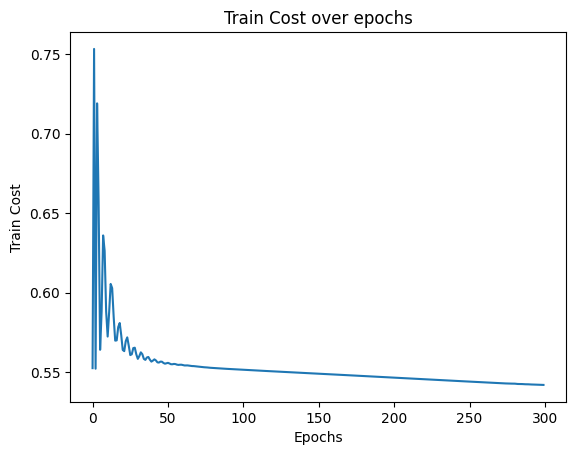

In [ ]:
plt.plot(range(300), costs1[0])
plt.xlabel('Epochs')
plt.ylabel('Train Cost')
plt.title('Train Cost over epochs')
plt.show()

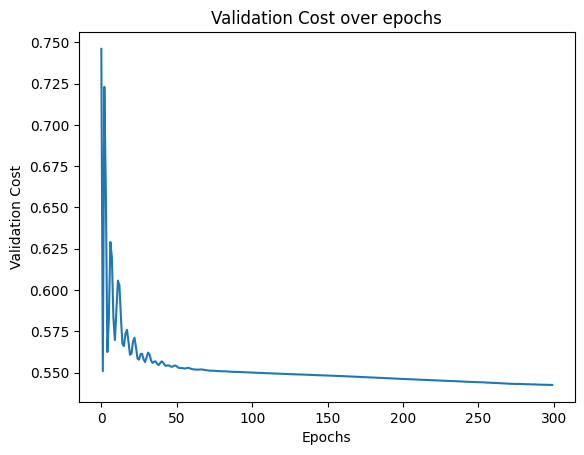

In [ ]:
plt.plot(range(300), costs1[1])
plt.xlabel('Epochs')
plt.ylabel('Validation Cost')
plt.title('Validation Cost over epochs')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_test_transposed = X_test.T
predictions, _ = nn.predict(X_test_transposed)

#Apply a threshold to turn predictions into binary output
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
accuracy = accuracy_score(y_test, binary_predictions.T)
f1 = f1_score(y_test, binary_predictions.T)  # 'y_test' gerçek etiketlerdir
print("F1 Score: ", round(f1,3))
print("Accuracy: ",round(accuracy,3))

F1 Score:  0.722
Accuracy:  0.735


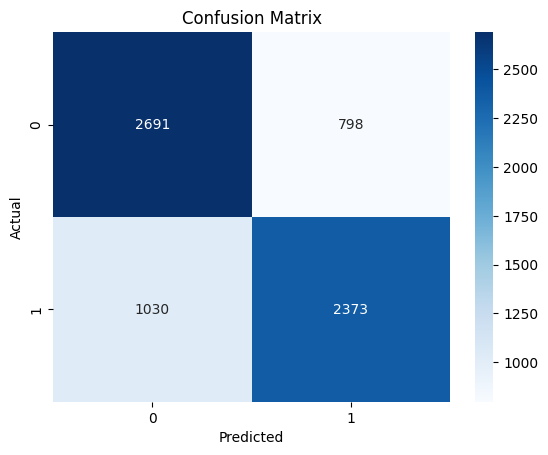

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn ile confusion matrix'i görselleştir

cm = confusion_matrix(y_test, binary_predictions.T)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'annot=True' değerleri gösterir
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
nn1 = NeuralNetwork(input_size=8)
nn1.add_hidden_layer('relu',16)
nn1.add_hidden_layer('relu',128)
nn1.add_hidden_layer('relu',8)
nn1.add_hidden_layer('sigmoid',1)



costs1=nn.train(X_train_transposed, y_train,X_val_transposed,y_val, epochs=300)

epoch: 1, cost_train: 0.5418200002360465, cost_val: 1.1161142872151575
epoch: 2, cost_train: 1.1240817255009732, cost_val: 0.5486189185087474
epoch: 3, cost_train: 0.5471618712422098, cost_val: 0.9296111270106737
epoch: 4, cost_train: 0.9262929390492264, cost_val: 0.8089423081633402
epoch: 5, cost_train: 0.808715886915686, cost_val: 0.6136699157945501
epoch: 6, cost_train: 0.6152511959500322, cost_val: 0.5871528839664648
epoch: 7, cost_train: 0.5918293907069802, cost_val: 0.646441231031278
epoch: 8, cost_train: 0.6545000162328403, cost_val: 0.680095832091464
epoch: 9, cost_train: 0.6893558315031213, cost_val: 0.6634290800109813
epoch: 10, cost_train: 0.6719031216644522, cost_val: 0.6296249595881817
epoch: 11, cost_train: 0.6363506871184074, cost_val: 0.6109156171894923
epoch: 12, cost_train: 0.6159261681464518, cost_val: 0.6122405838126022
epoch: 13, cost_train: 0.6159366458039767, cost_val: 0.6197508119090381
epoch: 14, cost_train: 0.6230346137157342, cost_val: 0.620624425213879
epoch

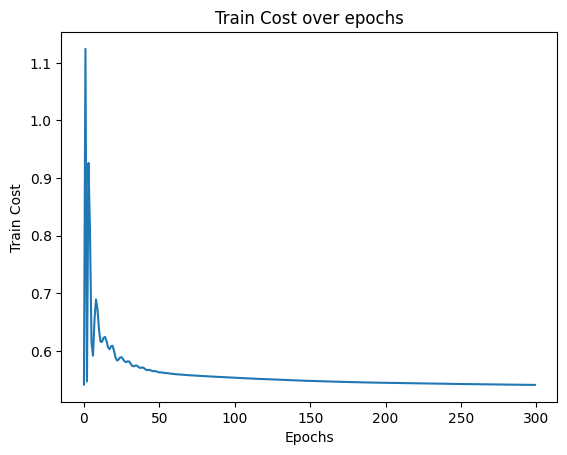

In [ ]:
plt.plot(range(300), costs1[0])
plt.xlabel('Epochs')
plt.ylabel('Train Cost')
plt.title('Train Cost over epochs')
plt.show()

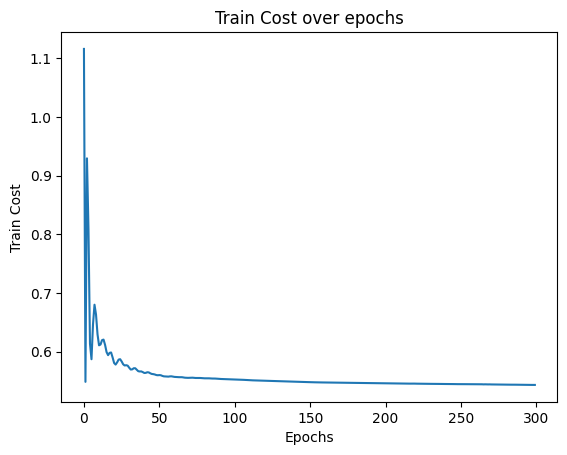

In [ ]:
plt.plot(range(300), costs1[1])
plt.xlabel('Epochs')
plt.ylabel('Train Cost')
plt.title('Train Cost over epochs')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
X_test_transposed = X_test.T
predictions, _ = nn.predict(X_test_transposed)

#Apply a threshold to turn predictions into binary output
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
accuracy = accuracy_score(y_test, binary_predictions.T)
f1 = f1_score(y_test, binary_predictions.T)  # 'y_test' gerçek etiketlerdir
print("F1 Score: ", round(f1,3))
print("Accuracy: ",round(accuracy,3))

F1 Score:  0.718
Accuracy:  0.732


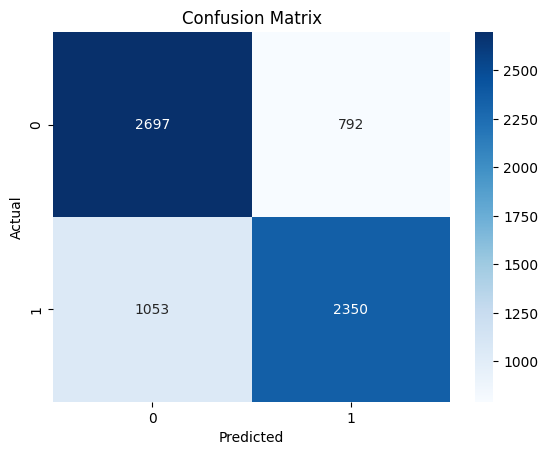

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn ile confusion matrix'i görselleştir

cm = confusion_matrix(y_test, binary_predictions.T)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 'annot=True' değerleri gösterir
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()